In [1]:
%matplotlib notebook
from blockops import BlockOperator, BlockIteration, one, PintRun

Definition of the block operators, that are common to each primary block iterations :

In [2]:
nBlocks = 4

phi = BlockOperator(r'$\phi$')  # integration operator
phiInv = BlockOperator(r'$\phi^{-1}$')  # inverse integration operator
phiDInv = BlockOperator(r'$\phi_{\Delta}^{-1}$')  # inverse approximate integration operator
chi = BlockOperator(r'$\chi$')  # transmission operator

blockOps = dict(rules=[(phiInv*phi, one), (phi*phiInv, one)], 
                i=one, phi=phi, phiInv=phiInv, phiDInv=phiDInv, chi=chi)

### Parareal like primary block iteration :

$$u_{n+1}^{k+1} = (\phi^{-1}\chi - \phi_{\Delta}^{-1}\chi) u_n^k + \phi_{\Delta}^{-1}\chi u_n^{k+1}$$

<IPython.core.display.Javascript object>


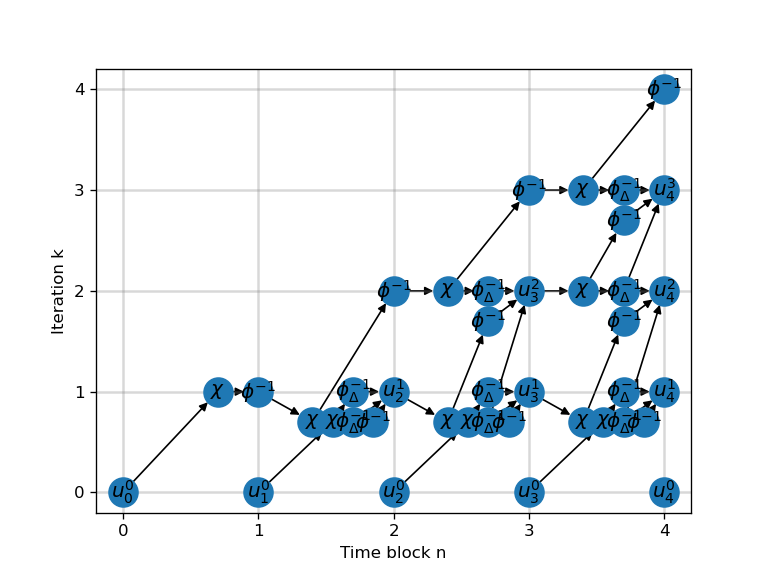

In [3]:
parareal = BlockIteration(
    update="(phiInv-phiDInv)*chi*u_{n}^k + phiDInv*chi* u_{n}^{k+1}",
    **blockOps)
PintRun(parareal, nBlocks)

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


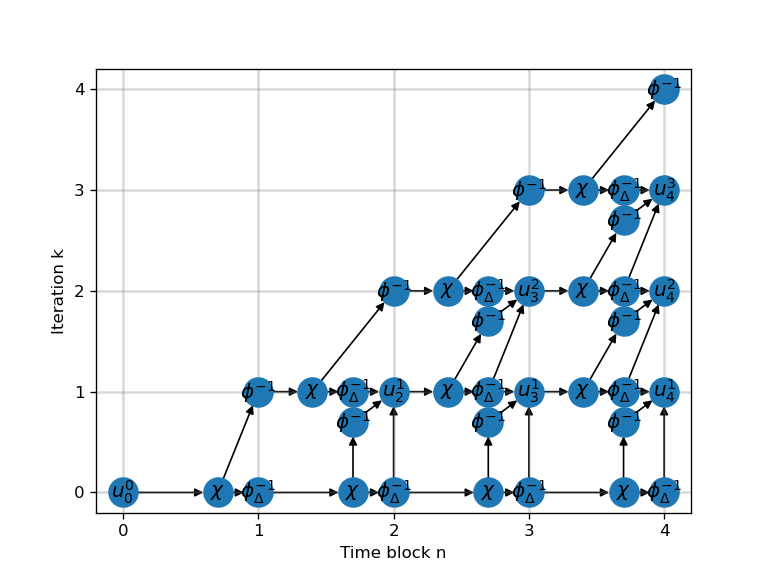

In [4]:
parareal = BlockIteration(
    update="(phiInv-phiDInv)*chi*u_{n}^k + phiDInv*chi* u_{n}^{k+1}",
    predictor="phiDInv*chi*u_{n}^0",
    **blockOps)
PintRun(parareal, nBlocks)

### Approximate Block Jacobi block iteration :

$$u_{n+1}^{k+1} =  \phi_{\Delta}^{-1}\chi u_n^k + (I-\phi_{\Delta}^{-1}\phi) u_{n+1}^{k}$$

<IPython.core.display.Javascript object>


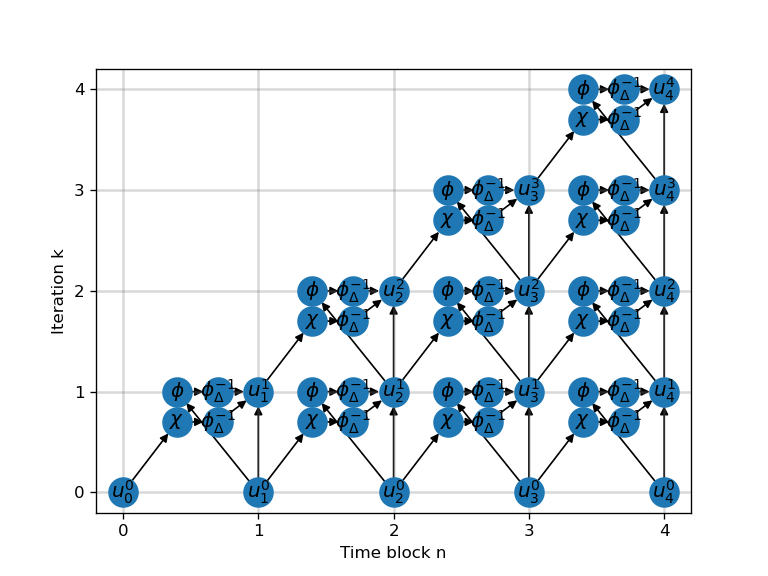

In [5]:
approxBlockJacobi = BlockIteration(
    update="phiDInv*chi*u_{n}^k + (i-phiDInv*phi)* u_{n+1}^{k}",
    **blockOps)
PintRun(approxBlockJacobi, nBlocks)

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


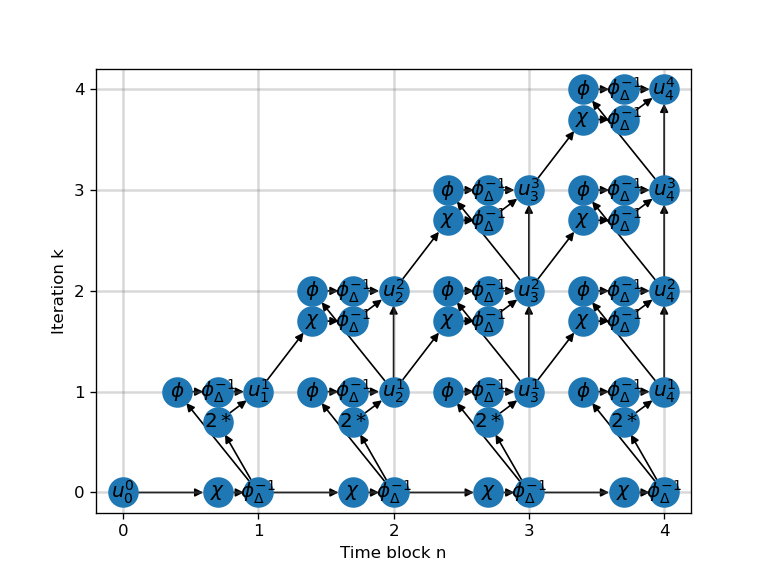

In [6]:
approxBlockJacobi = BlockIteration(
    update="phiDInv*chi*u_{n}^k + (i-phiDInv*phi)* u_{n+1}^{k}",
    predictor="phiDInv*chi*u_{n}^0",
    **blockOps)
PintRun(approxBlockJacobi, nBlocks)

### Approximate Block Gauss-Seidel block iteration :

$$u_{n+1}^{k+1} =  \phi_{\Delta}^{-1}\chi u_n^{k+1} + (I-\phi_{\Delta}^{-1}\phi) u_{n+1}^{k}$$

<IPython.core.display.Javascript object>


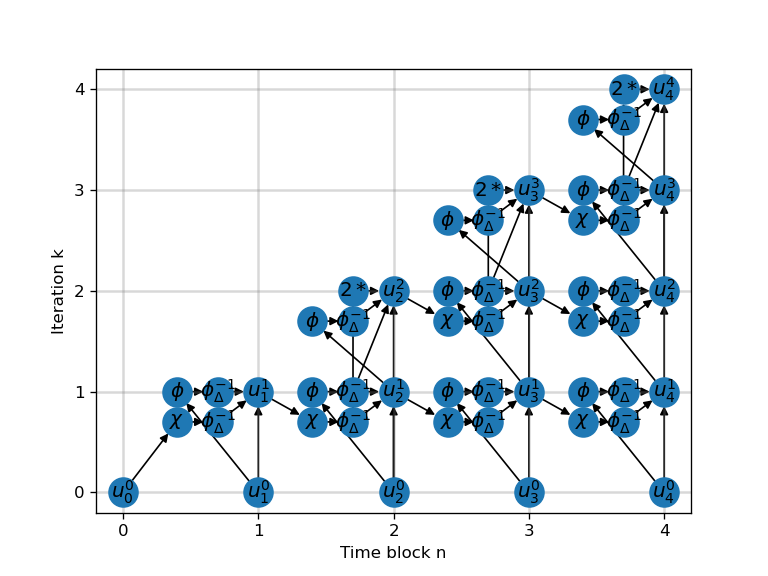

In [7]:
approxBlockGaussSeidel = BlockIteration(
    update="phiDInv*chi*u_{n}^{k+1} + (i-phiDInv*phi)* u_{n+1}^{k}",
    **blockOps)
PintRun(approxBlockGaussSeidel, nBlocks)

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


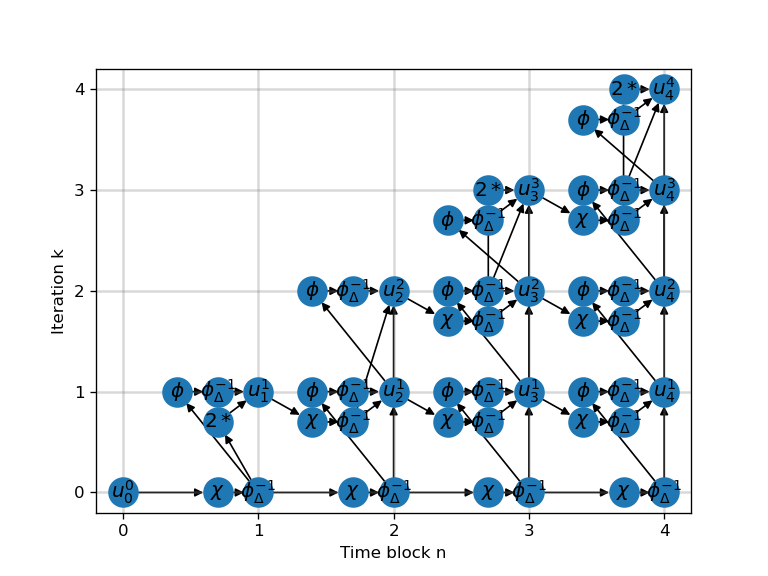

In [8]:
approxBlockGaussSeidel = BlockIteration(
    update="phiDInv*chi*u_{n}^{k+1} + (i-phiDInv*phi)* u_{n+1}^{k}",
    predictor="phiDInv*chi*u_{n}^0",
    **blockOps)
PintRun(approxBlockGaussSeidel, nBlocks)